In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import torch

In [31]:
plt.rcParams['axes.facecolor'] = 'none'

In [37]:
from epistemic.layer_scoring.mahalanobis import Mahalanobis

torch.Size([200]) torch.Size([200, 2])


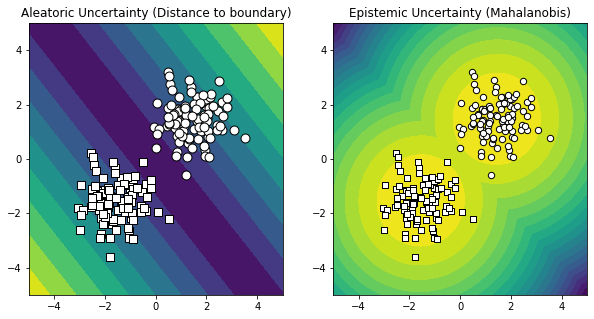

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# Generate train data
X = 0.8 * np.random.randn(100, 2)
X_train = np.r_[X + 1.5, X - 1.5]
y_train = np.r_[np.repeat(0, len(X)), np.repeat(1, len(X))]

# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 1.5, X - 1.5]
y_test = np.r_[np.repeat(0, len(X)), np.repeat(1, len(X))]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = abs(Z)
Z = Z.reshape(xx.shape)

axs[0].set_title("Aleatoric Uncertainty (Distance to boundary)")
axs[0].contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 10), cmap=plt.cm.viridis)
s = 80
axs[0].scatter(X_train[:len(X_train)//2, 0], X_train[:len(X_train)//2, 1], c="white", marker="o", s=s, edgecolors="k")
axs[0].scatter(X_train[len(X_train)//2:, 0], X_train[len(X_train)//2:, 1], c="white", marker=",", s=s, edgecolors="k")

axs[0].set_xlim((-5, 5))
axs[0].set_ylim((-5, 5))

maha = Mahalanobis().fit(torch.Tensor(X_train), torch.Tensor(y_train))

batched_Z = []
for batch in torch.split(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]), 10):
    batched_Z.append(maha.score(batch).numpy())
    
Z = np.concatenate(batched_Z)
Z = Z.reshape(xx.shape)

axs[1].set_title("Epistemic Uncertainty (Mahalanobis)")
axs[1].contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.viridis)

s = 40
axs[1].scatter(X_train[:len(X_train)//2, 0], X_train[:len(X_train)//2, 1], c="white", marker="o", s=s, edgecolors="k")
axs[1].scatter(X_train[len(X_train)//2:, 0], X_train[len(X_train)//2:, 1], c="white", marker=",", s=s, edgecolors="k")

axs[1].set_xlim((-5, 5))
axs[1].set_ylim((-5, 5));

torch.Size([200]) torch.Size([200, 2])


In [6]:
torch.split(torch.tensor([1,2,3,4,5]), 2)

(tensor([1, 2]), tensor([3, 4]), tensor([5]))

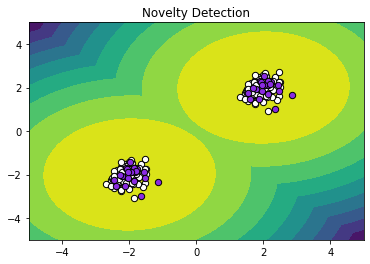

In [22]:


plt.show()

In [ ]:
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)
